In [2]:
#import libraries

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import numpy as np
from scipy import stats as st

In [3]:
#import data set

creditdata = pd.read_csv("default of credit card clients.csv", delimiter=';', header=None)

In [5]:
# Preview the first 5 lines of the loaded data 
creditdata.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [6]:
creditdata = creditdata.iloc[1:]

In [8]:
new_header = creditdata.iloc[0] 

creditdata = creditdata[1:] 

creditdata.columns = new_header

In [9]:
creditdata.head()

1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
creditdata.describe()

1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,13768,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [34]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 2 to 30001
Data columns (total 25 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null in

Time to clean and transform data :)

In [25]:
#Transform categorical variables

creditdata['SEX'] = creditdata['SEX'].astype('category')
creditdata['EDUCATION'] = creditdata['EDUCATION'].astype('category')
creditdata['MARRIAGE'] = creditdata['MARRIAGE'].astype('category')
creditdata['PAY_0'] = creditdata['PAY_0'].astype('category')
creditdata['PAY_2'] = creditdata['PAY_2'].astype('category')
creditdata['PAY_3'] = creditdata['PAY_3'].astype('category')
creditdata['PAY_4'] = creditdata['PAY_4'].astype('category')
creditdata['PAY_5'] = creditdata['PAY_5'].astype('category')
creditdata['PAY_6'] = creditdata['PAY_6'].astype('category')
creditdata['default payment next month'] = creditdata['default payment next month'].astype('category')

In [33]:
#Transform numeric variables to integer

creditdata['AGE'] = creditdata['AGE'].astype('int')

#another way to transform to numeric
creditdata[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
           'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
           'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = creditdata[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
           'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
           'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].apply(pd.to_numeric)


Are missing values in our dataset?

In [35]:
# Total missing values for each feature
print(creditdata.isnull().sum())

#we did not find missing values

1
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


Begins the Exploratory Data Analysis

In [47]:
from Dora import Dora

Visualizing the Data

In [36]:
header = creditdata.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=1)


Histograms

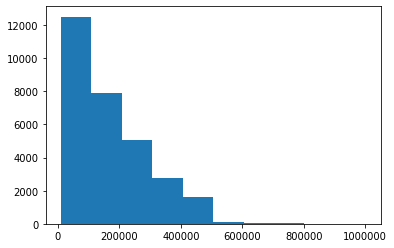

In [37]:
plt.hist(creditdata['LIMIT_BAL'])
plt.show()

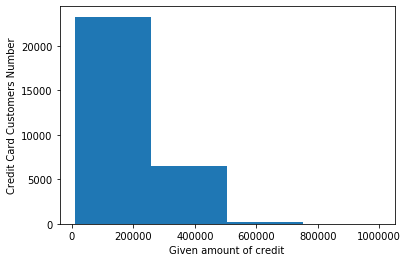

In [59]:
plt.hist(creditdata['LIMIT_BAL'], bins=4)
plt.ylabel('Credit Card Customers Number')
plt.xlabel('Given amount of credit')
plt.show()

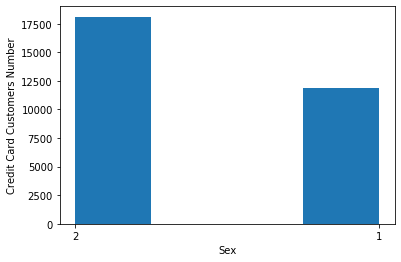

In [54]:
plt.hist(creditdata['SEX'], bins=4)
plt.xlabel('Sex')
plt.ylabel('Credit Card Customers Number')
plt.show()
#majority is female(2)

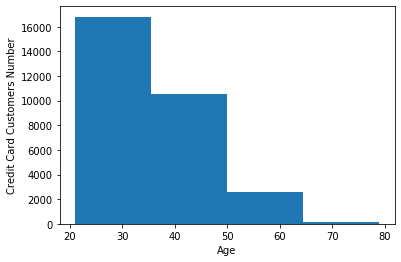

In [56]:
plt.hist(creditdata['AGE'], bins=4)
plt.xlabel('Age')
plt.ylabel('Credit Card Customers Number')
plt.show()

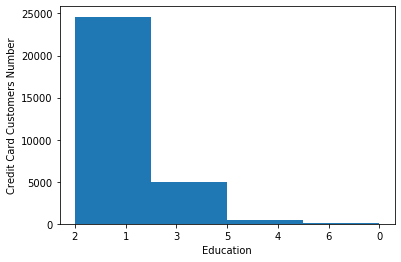

In [60]:
plt.hist(creditdata['EDUCATION'], bins=4)
plt.xlabel('Education')
plt.ylabel('Credit Card Customers Number')
plt.show()

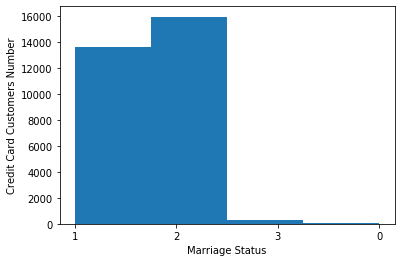

In [61]:
plt.hist(creditdata['MARRIAGE'], bins=4)
plt.xlabel('Marriage Status')
plt.ylabel('Credit Card Customers Number')
plt.show()
#most of them married (1) and single (2)

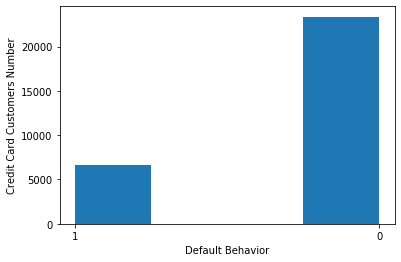

In [62]:
plt.hist(creditdata['default payment next month'], bins=4)
plt.xlabel('Default Behavior')
plt.ylabel('Credit Card Customers Number')
plt.show()

#more behavior not default

LinePlots

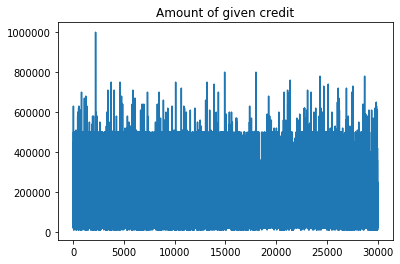

In [49]:
plt.plot(creditdata['LIMIT_BAL'])
plt.title('Amount of given credit')
plt.show()

Scatter plots

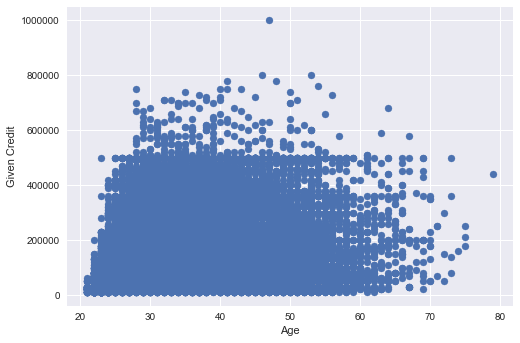

In [83]:
plt.style.use('seaborn')


x= creditdata['AGE']
y= creditdata['LIMIT_BAL']
c= creditdata['SEX']
plt.scatter(x,y)#, hue= c, alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Given Credit')
plt.show()

Using seaborn 

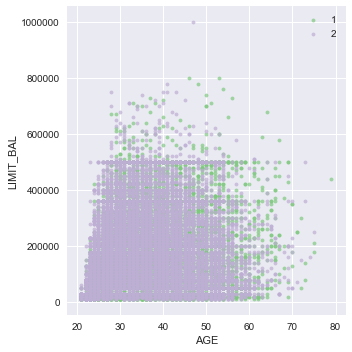

In [108]:
# library & dataset
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="AGE", y="LIMIT_BAL", data=creditdata, fit_reg=False, hue='SEX', legend=False,
          x_jitter=.00001, scatter_kws={"alpha":0.7,"s":15}, palette='Accent')
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
#sns.plt.show()


Text(0, 0.5, 'Given Credit')

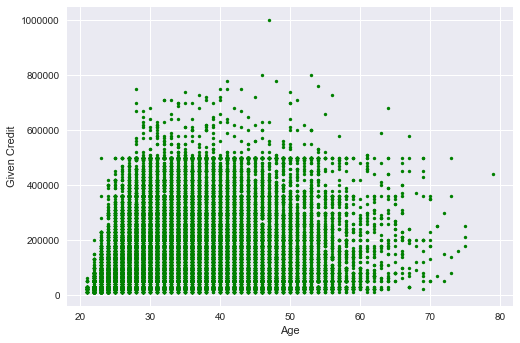

In [103]:
plt.style.use('seaborn')


# plot
plt.plot( 'AGE', 'LIMIT_BAL', data=creditdata,
         linestyle='', marker='o', markersize=3.4,
        color='green')
plt.xlabel('Age')
plt.ylabel('Given Credit')



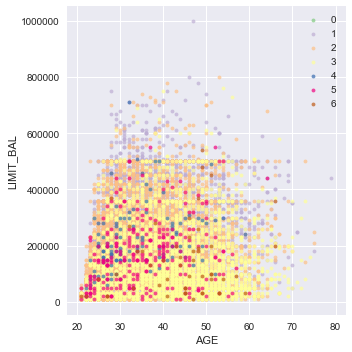

In [109]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="AGE", y="LIMIT_BAL", data=creditdata, fit_reg=False, hue='EDUCATION', legend=False,
          x_jitter=.00001, scatter_kws={"alpha":0.7,"s":15}, palette='Accent')
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
#sns.plt.show()


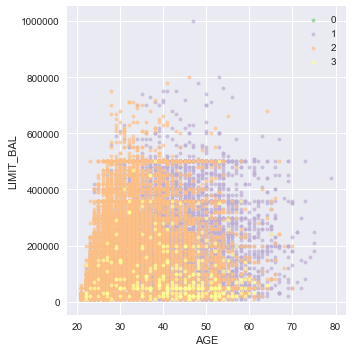

In [110]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="AGE", y="LIMIT_BAL", data=creditdata, fit_reg=False, hue='MARRIAGE', legend=False,
          x_jitter=.00001, scatter_kws={"alpha":0.7,"s":15}, palette='Accent')
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
#sns.plt.show()

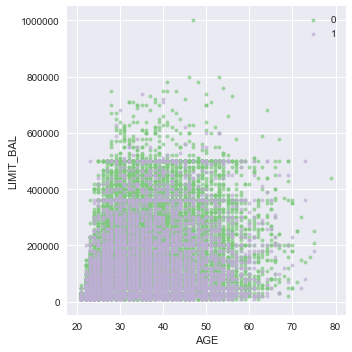

In [111]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="AGE", y="LIMIT_BAL", data=creditdata,
           fit_reg=False, hue='default payment next month', legend=False,
          x_jitter=.00001, scatter_kws={"alpha":0.7,"s":15}, palette='Accent')
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
#sns.plt.show()

Boxplots

In [113]:
header = creditdata.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=1)


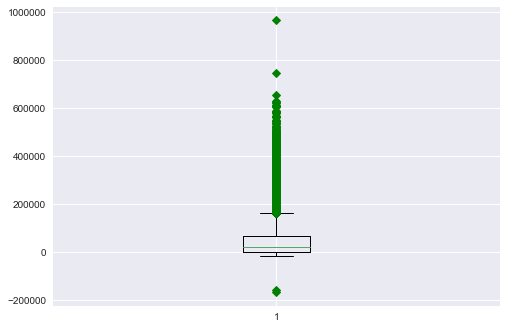

In [115]:
A = creditdata['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

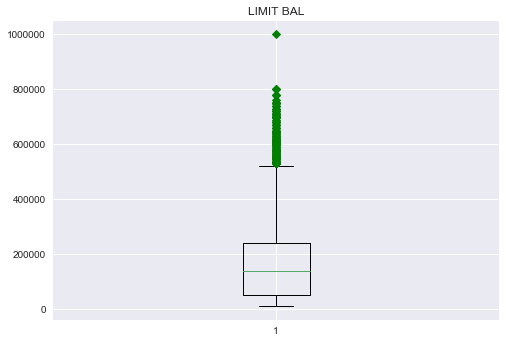

In [121]:
B = creditdata['LIMIT_BAL']
plt.boxplot(B,0,'gD')
plt.title('LIMIT BAL')
plt.show()

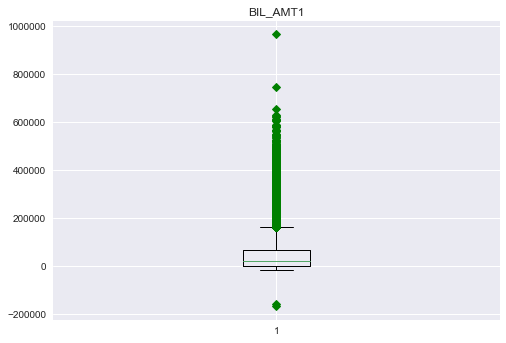

In [122]:
C = creditdata['BILL_AMT1']
plt.boxplot(C,0,'gD')
plt.title('BIL_AMT1')
plt.show()

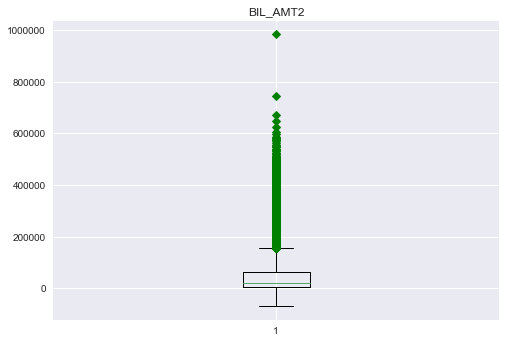

In [123]:
D = creditdata['BILL_AMT2']
plt.boxplot(D,0,'gD')
plt.title('BIL_AMT2')
plt.show()

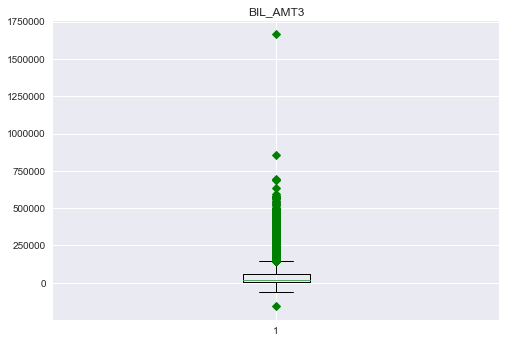

In [124]:
E = creditdata['BILL_AMT3']
plt.boxplot(E,0,'gD')
plt.title('BIL_AMT3')
plt.show()

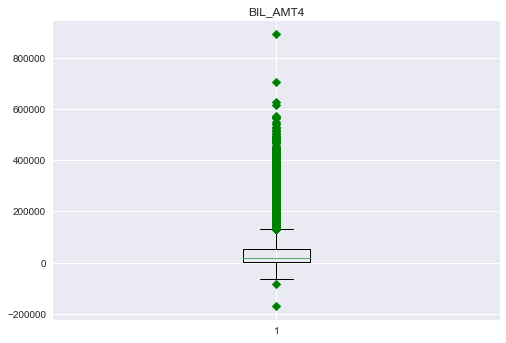

In [125]:
F = creditdata['BILL_AMT4']
plt.boxplot(F,0,'gD')
plt.title('BIL_AMT4')
plt.show()

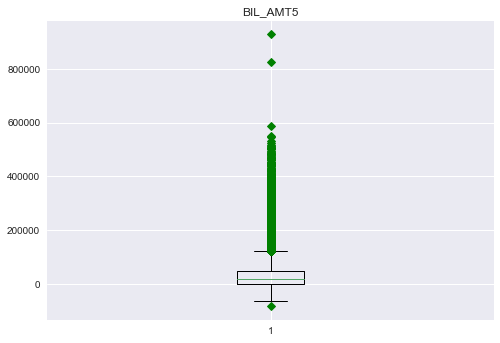

In [126]:
G = creditdata['BILL_AMT5']
plt.boxplot(G,0,'gD')
plt.title('BIL_AMT5')
plt.show()

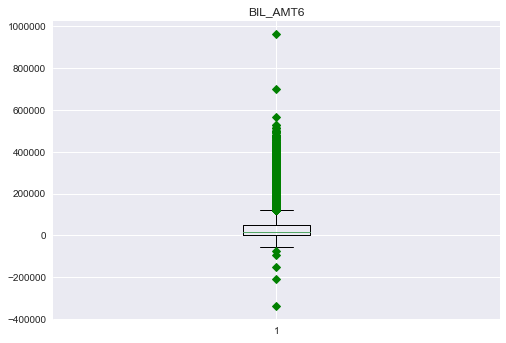

In [127]:
H = creditdata['BILL_AMT6']
plt.boxplot(H,0,'gD')
plt.title('BIL_AMT6')
plt.show()

Correlation

In [128]:
corrMat = creditdata.corr()
print(corrMat)

1          LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
1                                                                            
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  0.047613   0.802650   0.831594   0.853320   0.900941   
PAY_AMT1    0.195236  0.026147   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011 

Text(0.5, 1, 'Correlation Matrix')

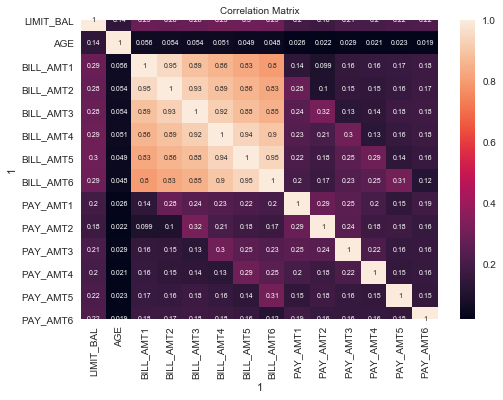

In [137]:
sns.heatmap(corrMat, annot=True, annot_kws={"size": 7},)
plt.title('Correlation Matrix', fontsize=10)

Covariance

In [138]:
covMat = creditdata.cov()
print(covMat)

1             LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
1                                                                    
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT1   4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAY_AMT4   4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAY_AMT5   4.305657e

Text(0.5, 1, 'Covariance Matrix')

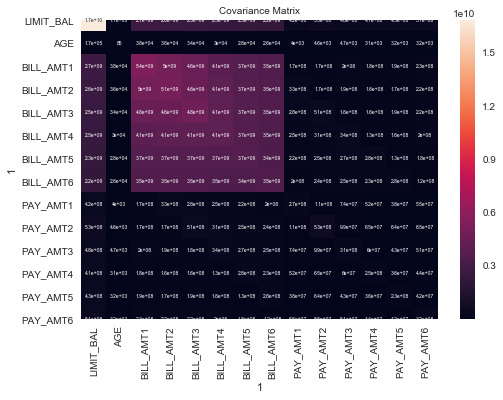

In [140]:
sns.heatmap(covMat, annot=True, annot_kws={"size": 5},)
plt.title('Covariance Matrix', fontsize=10)

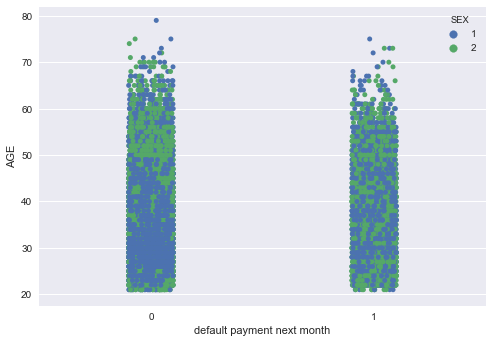

In [147]:
sns.stripplot('default payment next month', 'AGE',
              data=creditdata, jitter=True, hue='SEX' )

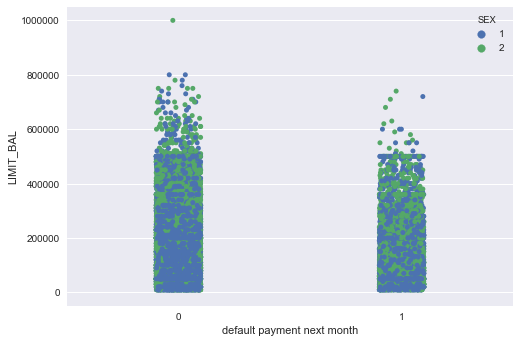

In [146]:
sns.stripplot('default payment next month', 'LIMIT_BAL',
              data=creditdata, jitter=True, hue='SEX')

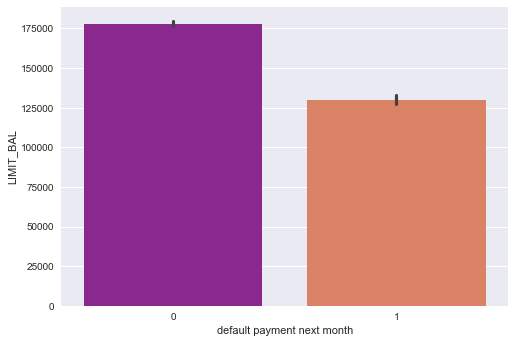

In [151]:

sns.barplot('default payment next month',
            y ='LIMIT_BAL', data = creditdata, palette ='plasma')

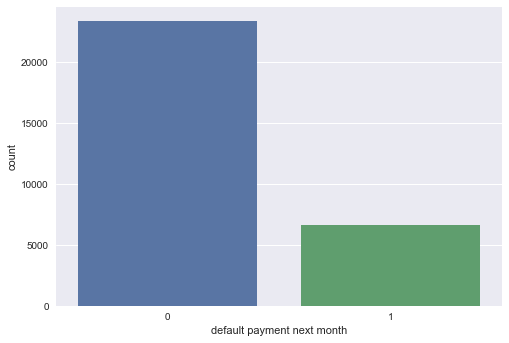

In [152]:
sns.countplot(creditdata['default payment next month'])

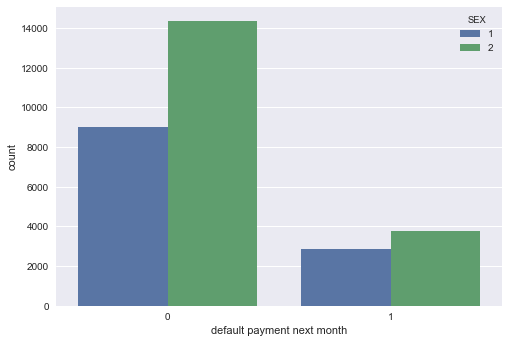

In [169]:
#sns.countplot(creditdata['default payment next month'], hue='AGE', data=pd.melt(creditdata))
ax = sns.countplot(x="default payment next month", hue="SEX", data=creditdata)

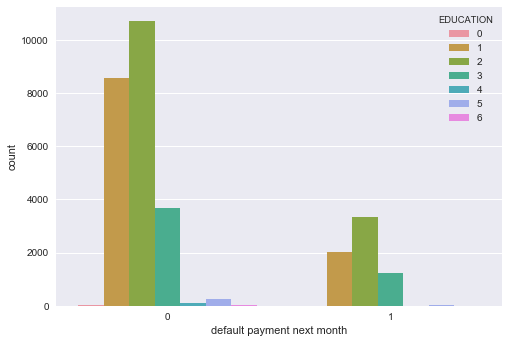

In [170]:
sns.countplot(x="default payment next month", hue="EDUCATION", data=creditdata)

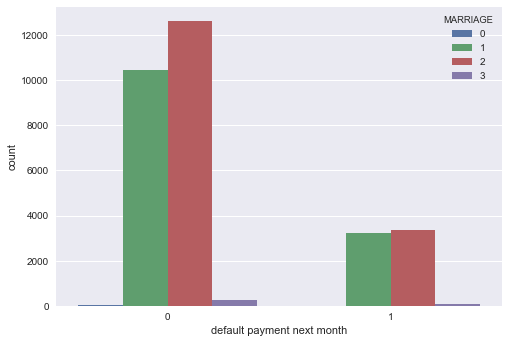

In [171]:
ax = sns.countplot(x="default payment next month", hue="MARRIAGE", data=creditdata)

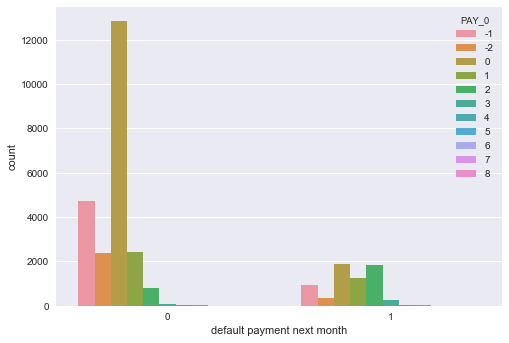

In [172]:
ax = sns.countplot(x="default payment next month", hue="PAY_0", data=creditdata)

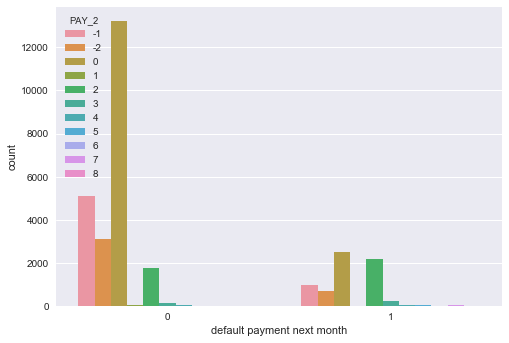

In [173]:
ax = sns.countplot(x="default payment next month", hue="PAY_2", data=creditdata)

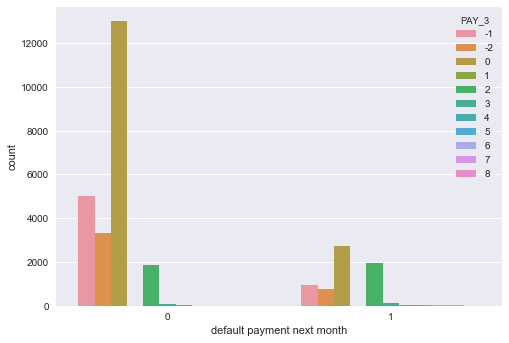

In [174]:
ax = sns.countplot(x="default payment next month", hue="PAY_3", data=creditdata)

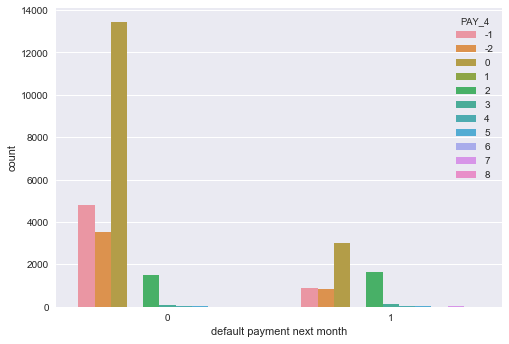

In [175]:
ax = sns.countplot(x="default payment next month", hue="PAY_4", data=creditdata)

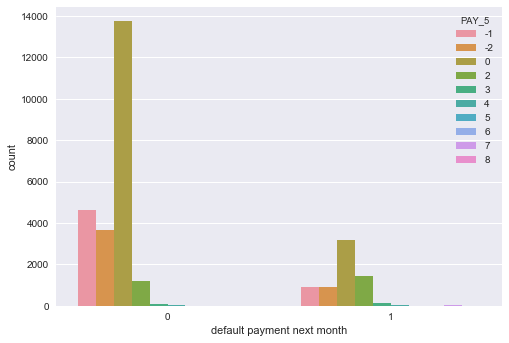

In [176]:
ax = sns.countplot(x="default payment next month", hue="PAY_5", data=creditdata)

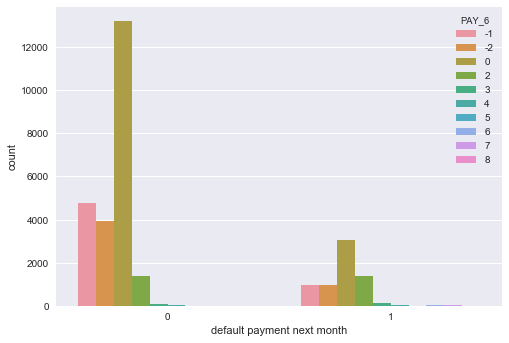

In [177]:
ax = sns.countplot(x="default payment next month", hue="PAY_6", data=creditdata)

(<Figure size 576x396 with 3 Axes>,
 OrderedDict([(('2', '1'), (0.0, 0.0, 0.6007296849087894, 0.2070725672962915)),
              (('2', '0'),
               (0.0,
                0.21039482643250412,
                0.6007296849087894,
                0.7896051735674958)),
              (('1', '1'),
               (0.605704809286899,
                0.0,
                0.3942951907131012,
                0.24086937664044927)),
              (('1', '0'),
               (0.605704809286899,
                0.2441916357766619,
                0.3942951907131012,
                0.7558083642233381))]))

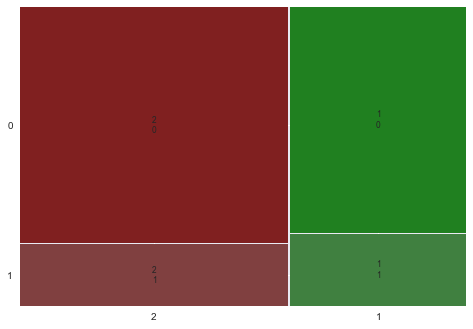

In [159]:
#from statsmodels.graphics.mosaicplot import mosaic
#mosaic(creditdata, ['SEX','default payment next month'])

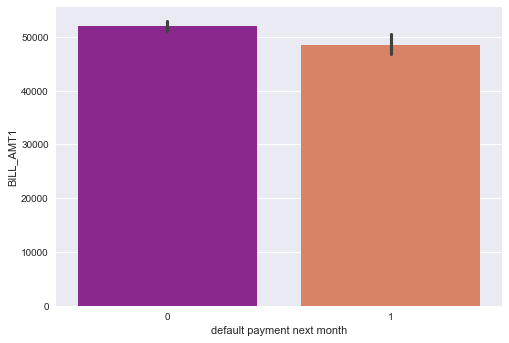

In [160]:
sns.barplot('default payment next month',
            y ='BILL_AMT1', data = creditdata, palette ='plasma')

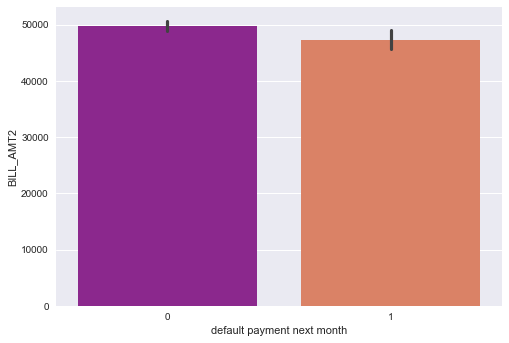

In [161]:
sns.barplot('default payment next month',
            y ='BILL_AMT2', data = creditdata, palette ='plasma')

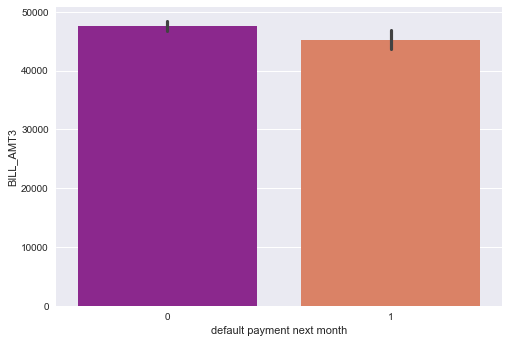

In [162]:
sns.barplot('default payment next month',
            y ='BILL_AMT3', data = creditdata, palette ='plasma')

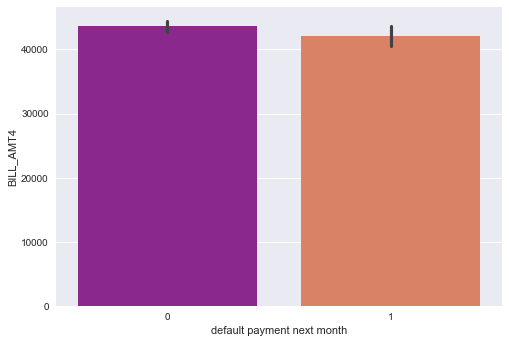

In [163]:
sns.barplot('default payment next month',
            y ='BILL_AMT4', data = creditdata, palette ='plasma')

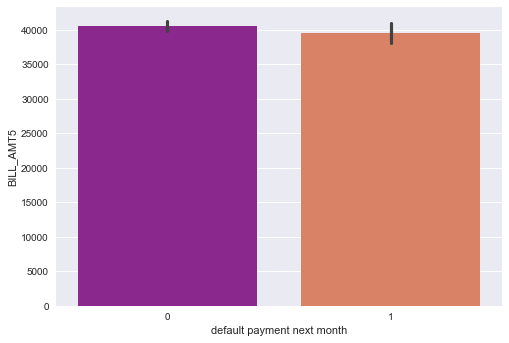

In [164]:
sns.barplot('default payment next month',
            y ='BILL_AMT5', data = creditdata, palette ='plasma')

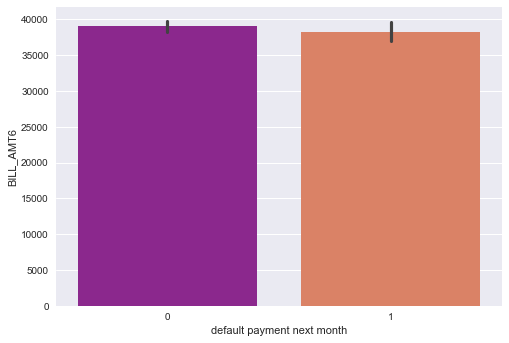

In [165]:
sns.barplot('default payment next month',
            y ='BILL_AMT6', data = creditdata, palette ='plasma')